# Biot Savart

In [697]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy.polynomial.polynomial as poly
from scipy.optimize import curve_fit
from scipy.constants import mu_0

In [698]:
def biot_savart_loop(distance_on_axis,current,loop_radius,MU_0 = mu_0):
    loop_radius_squared = loop_radius **2
    denominator = (loop_radius_squared + (distance_on_axis**2))**1.5
    return (MU_0/2) * current * (loop_radius_squared/denominator)


def biot_savart_line(current,distance_to_wire,MU_0=mu_0):
    return (MU_0/(4*np.pi))* current * (2/distance_to_wire)

def mag_field_solenoid(current,solenoid_length,number_loops,axial_distance,coil_radius,MU_0=mu_0):
    half_length = solenoid_length / 2
    radius_squared = coil_radius**2
    constant = (MU_0 * current * number_loops) / (2*solenoid_length)
    axial_dist_plus_half_length = (axial_distance + half_length)
    axial_dist_minus_half_length = (axial_distance - half_length)

    denominator_1 = np.sqrt(axial_dist_plus_half_length**2 + radius_squared)

    denominator_2 = np.sqrt(axial_dist_minus_half_length**2 + radius_squared)

    return constant * ((axial_dist_plus_half_length/denominator_1) - (axial_dist_minus_half_length/denominator_2))

def mag_field_infinite_solenoid(current,solenoid_length,number_loops,MU_0=mu_0):
    return MU_0 * current * number_loops * (1/solenoid_length)

In [699]:
teslameter_error = 0.001 #mT

## 1.0

### 1.1 40 mm Loop Changing Current


40 mm loop 


Measurements taken by recording numbers in a 10 second video



$$B = \frac{\mu_0}{4\pi}\frac{2\pi r^2}{(r^2+x^2)^\frac{3}{2}}I$$

In [700]:
teslameter_output_0_amps = - np.mean(np.array(
    [
        0.01,
        0.02,
        0.01,
        0.03,
        0.00,
        0.01,
        0.03,
        0.02,
        0.00,
        0.02,
        0.03,
        0.02,
        0.00,
        0.03,
        0.02,
        0.04,
        0.01,
        0.02,
        0.04,
        0.03,
    ]
))




teslameter_output_2_amps = np.mean(np.array(
    [
        -0.04,
        -0.09,
        -0.03,
        -0.01,
        -0.02,
        -0.01,
        -0.02,
        -0.03,
        -0.02,
        -0.08,
        -0.04,
        -0.03,
        -0.04,
        -0.09,
        -0.05,
        -0.06,
        -0.03,
        -0.01,
        -0.02,
        -0.03,
        -0.01,
        -0.02,
        -0.08,
        -0.04,
        -0.09,
        -0.03,
        -0.05
    ]
))

teslameter_output_4_amps = - np.mean(np.array(
    [
        0.05,
        0.06,
        0.07,
        0.09,
        0.07,
        0.09,
        0.05,
        0.09,
        0.07,
        0.09,
        0.05,
        0.09,
        0.07,
        0.09,
        0.08,
        0.06,
        0.08,
        0.09,
        0.08,
        0.09,
        0.05,
        0.06,
        0.08,
        0.07,
        0.08,
        0.06,
        0.07,
        0.05,
        0.07,
        0.08,
        0.07,
        0.09
    ]
))


teslameter_output_6_amps = - np.mean(np.array(
    [
        0.06,
        0.08,
        0.10,
        0.08,
        0.09,
        0.08,
        0.07,
        0.08,
        0.07,
        0.11,
        0.08,
        0.09,
        0.08,
        0.10,
        0.08,
        0.09,
        0.08,
        0.06,
        0.08,
        0.09,
        0.08,
        0.06,
        0.08,
        0.07,
        0.11,
        0.08,
        0.06,
        0.05,
        0.09,
        0.11,
        0.07,
        0.08,
        0.10,
    ]
))


teslameter_output_8_amps = - np.mean(np.array(
    [
        0.12,
        0.13,
        0.10,
        0.12,
        0.11,
        0.13,
        0.12,
        0.10,
        0.14,
        0.19,
        0.13,
        0.12,
        0.11,
        0.14,
        0.19,
        0.15,
        0.19,
        0.11,
        0.09,
        0.13,
        0.11,
        0.10,
        0.11,
        0.10,
        0.11,
        0.13,
        0.14
    ]
))

teslameter_output_10_amps = - np.mean(np.array(
    [
        0.14,
        0.13,
        0.14,
        0.11,
        0.14,
        0.18,
        0.12,
        0.11,
        0.09,
        0.15,
        0.19,
        0.13,
        0.12,
        0.18,
        0.14,
        0.19,
        0.13,
        0.19,
        0.15,
        0.18,
        0.12,
        0.13,
        0.12,
        0.10,
        0.11,
        0.12,
        0.13,
        0.12,
        0.15,
        0.12,
        0.15
    ]
))


teslameter_output_12_amps = - np.mean(np.array(
    [
        0.16,
        0.12,
        0.17,
        0.19,
        0.15,
        0.18,
        0.17,
        0.15,
        0.19,
        0.13,
        0.15,
        0.19,
        0.16,
        0.18,
        0.17,
        0.18,
        0.19,
        0.16,
        0.17,
        0.18,
        0.16,
        0.17,
        0.13,
        0.16,
        0.14,
        0.16,
    ]
))

teslameter_output_14_amps = - np.mean(np.array(
    [
        0.19,
        0.16,
        0.17,
        0.16,
        0.19,
        0.20,
        0.19,
        0.17,
        0.18,
        0.16,
        0.18,
        0.19,
        0.21,
        0.18,
        0.17,
        0.18,
        0.17,
        0.19,
        0.15,
        0.19,
        0.18,
        0.16,
        0.15,
        0.16,
    ]
))

teslameter_output_16_amps = - np.mean(np.array(
    [
        0.21,
        0.25,
        0.23,
        0.19,
        0.20,
        0.22,
        0.23,
        0.22,
        0.23,
        0.24,
        0.26,
        0.21,
        0.20,
        0.19,
        0.22,
        0.21,
        0.24,
        0.21,
        0.22,
        0.23,
        0.22,
        0.20,
        0.22,
        0.18,
        0.22
    ]
))

In [701]:
x_data = np.arange(0,17,2)
y_data = np.array(
    [
        teslameter_output_0_amps,
        teslameter_output_2_amps,
        teslameter_output_4_amps,
        teslameter_output_6_amps,
        teslameter_output_8_amps,
        teslameter_output_10_amps,
        teslameter_output_12_amps,
        teslameter_output_14_amps,
        teslameter_output_16_amps
    ]
) #mT

x_distance = 36.7 #cm

y_data/1000

array([-1.95000000e-05, -3.96296296e-05, -7.31250000e-05, -8.15151515e-05,
       -1.26666667e-04, -1.38064516e-04, -1.63846154e-04, -1.76250000e-04,
       -2.18000000e-04])

In [702]:
increasing_amps_40_mm_fit_x = np.linspace(0,max(x_data),10000)
increasing_amps_fit_coeffients = np.polynomial.polynomial.polyfit(x_data,np.abs(y_data),1)
increasing_amps_fit = np.polynomial.polynomial.Polynomial(increasing_amps_fit_coeffients)

theoretical_40_mm_loop = biot_savart_loop(current=increasing_amps_40_mm_fit_x,distance_on_axis=0,loop_radius=40*0.001,)


idx = np.argwhere(np.diff(np.sign(increasing_amps_fit(increasing_amps_40_mm_fit_x) - theoretical_40_mm_loop*1000))).flatten()

intersection_x_val = increasing_amps_40_mm_fit_x[idx]


intersection_x_val

array([5.15891589])

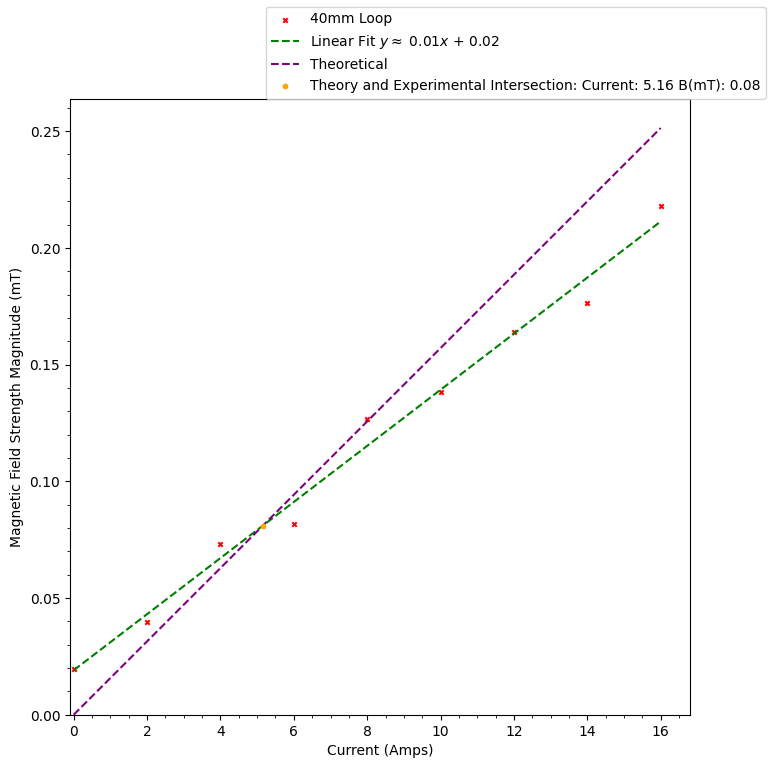

In [703]:
fig,ax = plt.subplots(figsize=(8,8))
ax.scatter(x_data,np.abs(y_data),label="40mm Loop",s=10,color="red",marker="x")
ax.plot(increasing_amps_40_mm_fit_x,increasing_amps_fit(increasing_amps_40_mm_fit_x),color="green",ls="dashed",label=f"Linear Fit $y \\approx$ {increasing_amps_fit_coeffients[1]:.2f}$x$ + {increasing_amps_fit_coeffients[0]:.2f}")
ax.plot(increasing_amps_40_mm_fit_x,theoretical_40_mm_loop*1000,color="purple",ls="dashed",label="Theoretical")
ax.scatter(intersection_x_val,increasing_amps_fit(intersection_x_val),s=10,marker="o",label=f"Theory and Experimental Intersection: Current: {intersection_x_val[0]:.2f} B(mT): {increasing_amps_fit(intersection_x_val)[0]:.2f}",zorder=99999,c="orange")
ax.set_xlabel("Current (Amps)")
ax.set_ylabel("Magnetic Field Strength Magnitude (mT)")
ax.set_xlim(-0.1,)
ax.set_ylim(0,)
ax.minorticks_on()
fig.legend()
plt.show()

In [704]:
del increasing_amps_40_mm_fit_x,increasing_amps_fit,increasing_amps_fit_coeffients,intersection_x_val,idx,theoretical_40_mm_loop,x_data,y_data,x_distance,teslameter_output_0_amps,teslameter_output_2_amps,teslameter_output_4_amps,teslameter_output_6_amps,teslameter_output_8_amps,teslameter_output_10_amps,teslameter_output_12_amps,teslameter_output_14_amps,teslameter_output_16_amps

### 1.21 40 mm Loop Changing Axial Distance of Detector

### 1.22 80 mm Loop Changing Axial Distance of Detector

### 1.23 120 mm Loop Changing Axial Distance of Detector

In [705]:
loop_40mm_axial_dist = {
    -10:np.mean([-0.03,-0.05,-0.01,0,-0.04]),
    -9:np.mean([-0.02,0,-0.01]),
    -8:np.mean([-0.03,-0.04,-0.02]),
    -7:np.mean([-0.01,-0.02,-0.03,0,-0.01]),
    -6:-0.03,
    -5:-0.03,
    -4:-0.04,
    -3:-0.04,
    -2:-0.05,
    -1:np.mean([-0.1,-0.09,-0.12,-0.08,-0.07]),
    0:-0.22,
    1:-0.45,
    2:-0.56,
    3:-0.28,
    4:-0.12,
    5:-0.09,
    6:-0.05,
    7:-0.05,
    8:-0.03,
    9:-0.03,
    10:-0.02

}

y_val = np.abs(np.array([x for x in loop_40mm_axial_dist.values()]))
exp_x_val = np.arange(-10,11,1)

axial_dist_fit_x = np.linspace(-10,10,10000,endpoint=True)
axial_dist_fit_coeff = poly.polyfit(exp_x_val,y_val,2)
axial_dist_fit = poly.Polynomial(axial_dist_fit_coeff)


theory = biot_savart_loop(current=16,loop_radius=40/1000,distance_on_axis=axial_dist_fit_x/100) #T


test_theory_coef,_ = curve_fit(biot_savart_loop,exp_x_val/100,y_val/1000)
test_theory_coef


array([2.61467731e-01, 4.19076616e-02, 9.54826358e-05])

In [706]:
loop_80mm_axial_dist = np.array([0.01,0.02,0.04,0.05,0.05,0.05,0.07,0.09,0.11,0.16,0.21,0.25,0.28,0.23,0.19,0.13,0.09,0.07,0.06,0.03,0.03])
theory_80mm = biot_savart_loop(current=16,loop_radius=80/1000,distance_on_axis=axial_dist_fit_x/100) #T


loop_120mm_axial_dist = np.array([0.04,0.02,0.04,0.05,0.06,0.08,0.09,0.12,0.11,0.13,0.15,0.17,0.18,0.16,0.13,0.11,0.09,0.08,0.06,0.06,0.06])
theory_120mm = biot_savart_loop(current=16,loop_radius=120/1000,distance_on_axis=axial_dist_fit_x/100) #T

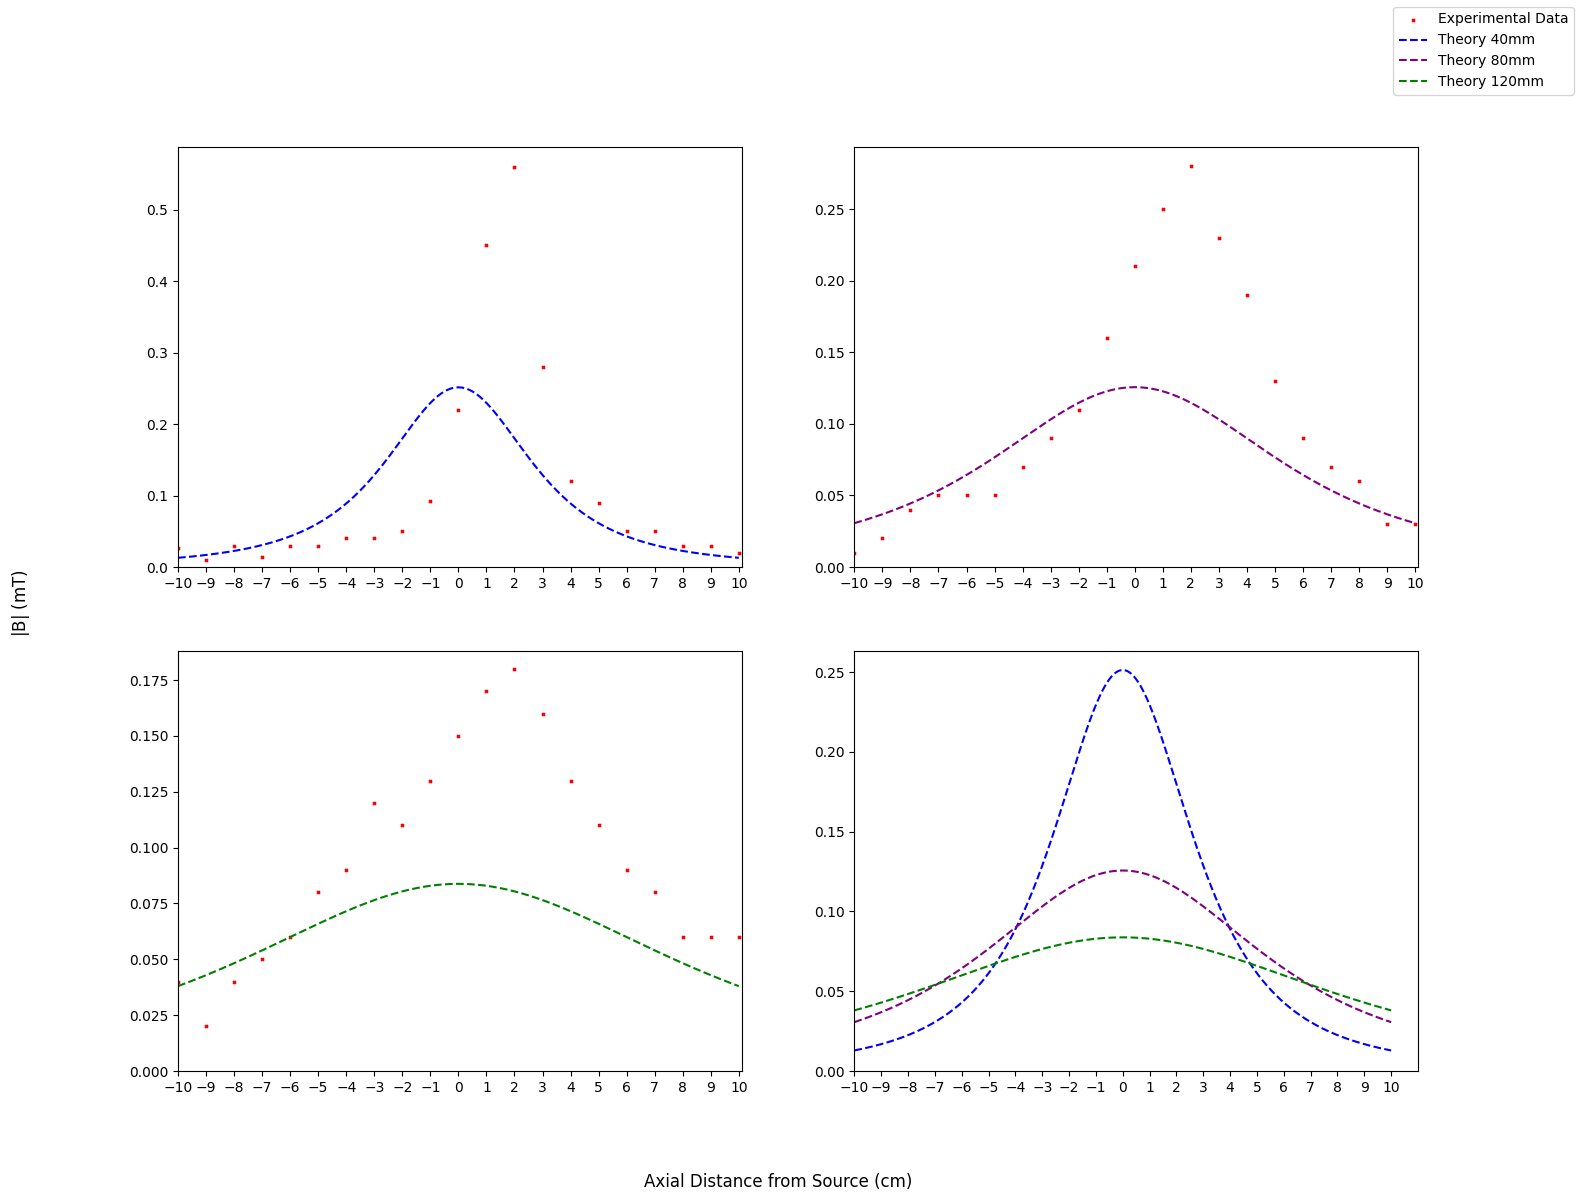

In [707]:
fig,ax = plt.subplots(2,2,figsize=(16,12))
ax[0,0].scatter(exp_x_val,y_val,s=4,c="red",marker="x",label="Experimental Data")
#ax[0].plot(axial_dist_fit_x,biot_savart_loop(axial_dist_fit_x,*test_theory_coef)*1000,ls="dashed",c="green",label=f"Fit")
#ax[0].plot(exp_x_val,y_val)
ax[0,0].plot(axial_dist_fit_x,theory*1000,ls="dashed",c="blue",label="Theory 40mm")

ax[0,1].scatter(exp_x_val,loop_80mm_axial_dist,s=4,c="red",marker="x")
#ax[1].plot(axial_dist_fit_x,biot_savart_loop(axial_dist_fit_x,*test_theory_coef)*1000,ls="dashed",c="green",label=f"Fit")
#ax[1].plot(exp_x_val,y_val)
ax[0,1].plot(axial_dist_fit_x,theory_80mm*1000,ls="dashed",c="purple", label="Theory 80mm")

ax[1,0].scatter(exp_x_val,loop_120mm_axial_dist,s=4,c="red",marker="x")
#ax[1].plot(axial_dist_fit_x,biot_savart_loop(axial_dist_fit_x,*test_theory_coef)*1000,ls="dashed",c="green",label=f"Fit")
#ax[2].plot(exp_x_val,y_val)
ax[1,0].plot(axial_dist_fit_x,theory_120mm*1000,ls="dashed",c="green",label="Theory 120mm")


ax[0,0].set_xlim(-10,10.1)
ax[0,1].set_xlim(-10,10.1)
ax[1,0].set_xlim(-10,10.1)


ax[0,0].set_ylim(0,)
ax[0,1].set_ylim(0,)
ax[1,0].set_ylim(0,)


ax[0,0].set_xticks(exp_x_val)
ax[0,1].set_xticks(exp_x_val)
ax[1,0].set_xticks(exp_x_val)


ax[1,1].plot(axial_dist_fit_x,theory*1000,ls="dashed",c="blue")
ax[1,1].plot(axial_dist_fit_x,theory_80mm*1000,ls="dashed",c="purple")
ax[1,1].plot(axial_dist_fit_x,theory_120mm*1000,ls="dashed",c="green")
ax[1,1].set_xticks(exp_x_val)
ax[1,1].set_xlim(-10,)
ax[1,1].set_ylim(0,)

fig.supylabel("$\\vert \\text{B} \\vert$ (mT)")
fig.supxlabel("Axial Distance from Source (cm)")
fig.legend()
plt.show()

In [708]:
del loop_40mm_axial_dist,loop_80mm_axial_dist,loop_120mm_axial_dist,y_val,exp_x_val,axial_dist_fit,axial_dist_fit_coeff,axial_dist_fit_x,theory,test_theory_coef,theory_80mm,theory_120mm

### 1.3 Magnetic Field along an 'infinitely' long wire

In [709]:
vertical_heights = np.array([5.5,5,4.5,4,3.5,3,2.5,0,-0.5,-1,-1.5,-2,-2.5,-3]) #cm
magnetic_field = np.array([0.03,-0.05,-0.05,-0.06,-0.08,-0.10,-0.14,0.86,0.36,0.22,0.15,0.11,0.07,0.06]) #mT

#vertical_heights = np.flip(np.array([3,2.5,0,-0.5,-1,-1.5,-2,-2.5,-3])) #cm
#magnetic_field = np.flip(np.array([-0.08,-0.10,-0.14,0.86,0.36,0.22,0.15,0.11,0.07,0.06])) #mT

fit_x = np.linspace(min(vertical_heights),max(vertical_heights),10000) #cm

theory = - biot_savart_line(current = 16,distance_to_wire=fit_x/100)#mT



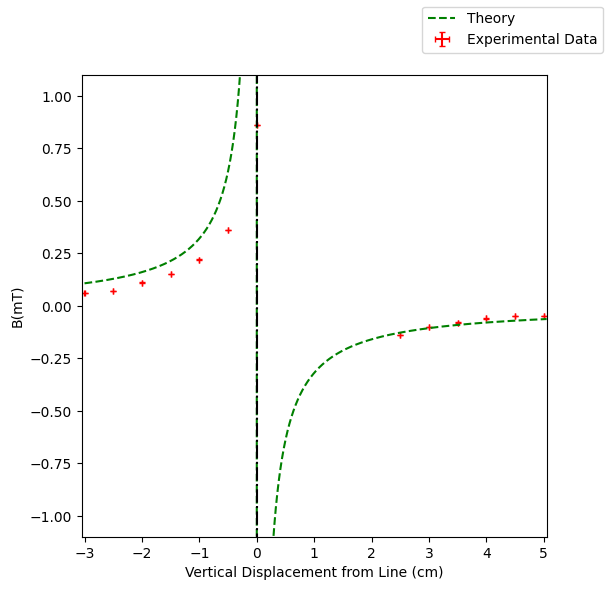

In [710]:
fig, ax = plt.subplots(figsize=(6,6))
#ax.scatter(vertical_heights,magnetic_field,s=5,c="red",marker="x",label="Experimental Data")
ax.errorbar(vertical_heights,magnetic_field,teslameter_error,0.002,ls="none",c="red",capsize=2,label="Experimental Data")
ax.plot(fit_x[np.logical_or(fit_x > 0, fit_x < 0)],theory[np.logical_or(theory > 0,theory < 0)] *1000,ls="dashed",label= "Theory",c="green")
#ax.plot(fit_x,theory*1000,ls="dashed",c="green")


ax.set_xlabel("Vertical Displacement from Line (cm)")
ax.set_ylabel("B(mT)")
ax.vlines(0,-10,10,color="black",ls="dashdot")
ax.set_ylim(-1.1,1.1)
ax.set_xlim(-3.05,5.05)
fig.legend()
plt.show()

In [711]:
del vertical_heights, magnetic_field, theory,fit_x

## 2.0 Axial Magnetic Field of a Solenoid

### 2.1 Changing Current

In [712]:
currents = np.arange(0,17,2) #A
magnetic_field = np.mean(np.array([[0,0,0],
                           [0.55,0.52,0.53],
                           [1.1,1.08,1.1],
                           [1.64,1.65,1.62],
                           [2.2,2.17,2.17],
                           [2.73,2.71,2.74],
                           [3.28,3.27,3.28],
                           [3.83,3.81,3.82],
                           [4.36,4.34,4.34]]),1) #mT

len_solenoid = 15 #cm
radius_solenoid = 8 #cm
N_loops = 30
distance_from_center = 0

#theory = mag_field_solenoid(current=currents,solenoid_length=len_solenoid/100,number_loops=N_loops,axial_distance=distance_from_center,coil_radius=radius_solenoid/100)
theory_x = np.linspace(0,16,10000)
theory_inf = mag_field_infinite_solenoid(current=theory_x,solenoid_length=len_solenoid/100,number_loops=N_loops) #mT
theory = mag_field_solenoid(current=theory_x,solenoid_length=len_solenoid/100,number_loops=N_loops,axial_distance=0,coil_radius=radius_solenoid/100)
theory

array([0.00000000e+00, 2.75056552e-07, 5.50113105e-07, ...,
       2.74974035e-03, 2.75001541e-03, 2.75029047e-03])

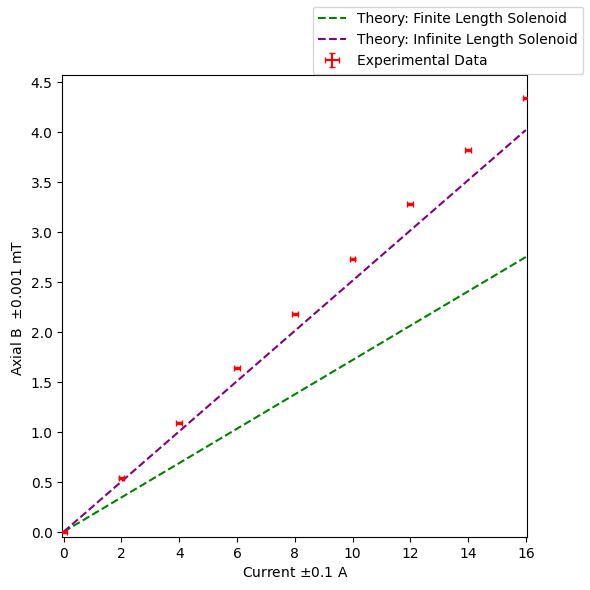

In [713]:
fig, ax = plt.subplots(figsize=(6,6))
ax.errorbar(currents,magnetic_field,0.01,0.1,ls="none",c="red",label="Experimental Data",capsize=2,zorder=9999)
ax.plot(theory_x,theory*1000,ls="dashed",c="green",label="Theory: Finite Length Solenoid")
ax.plot(theory_x,theory_inf*1000,ls="dashed",c="purple",label="Theory: Infinite Length Solenoid")


ax.set_xlabel("Current $\pm 0.1$ A")
ax.set_ylabel("Axial B  $\pm 0.001$ mT  ")
ax.set_xlim(-0.05,16.05)
ax.set_ylim(-0.05,)
ax.set_yticks(np.arange(0,5,0.5))
fig.legend()
plt.show()

In [714]:
del currents,magnetic_field,len_solenoid,radius_solenoid,N_loops,distance_from_center,theory,theory_x,theory_inf

### 2.2 Changing Solenoid Length

In [715]:
lengths = np.arange(10,41,5)
magnetic_field = np.abs(np.mean(np.array([[-5.52,-5.55,-5.54],
                                   [-4.38,-4.38,-4.40],
                                   [-3.38,-3.39,-3.37],
                                   [-2.95,-2.96,-2.94],
                                   [-2.4,-2.41,-2.41],
                                   [-1.9,-1.9,-1.89],
                                   [-1.82,-1.81,-1.83]]),1))


theory_x = np.linspace(10,40,10000)
theory = mag_field_solenoid(current=16,solenoid_length=theory_x/100,axial_distance=0,number_loops=30,coil_radius=8/100)
theory_inf = mag_field_infinite_solenoid(current=16,solenoid_length=theory_x/100,number_loops=30)


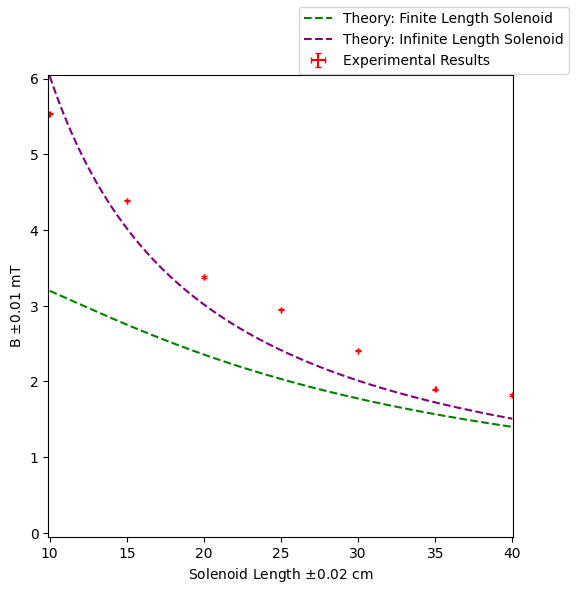

In [716]:
fig,ax = plt.subplots(figsize=(6,6))
ax.errorbar(lengths,magnetic_field,0.01,0.02,ls="none",c="red",capsize=2,label="Experimental Results")
ax.plot(theory_x,theory*1000,ls="dashed",c="green",label="Theory: Finite Length Solenoid")
ax.plot(theory_x,theory_inf*1000,ls="dashed",c="purple",label="Theory: Infinite Length Solenoid")

ax.set_ylabel("B $\pm 0.01$ mT")
ax.set_xlabel("Solenoid Length $\pm 0.02$ cm")
ax.set_xlim(9.9,40.05)
ax.set_ylim(-0.05,6.05)
fig.legend()

In [717]:
del lengths,magnetic_field,theory,theory_x,theory_inf

### 2.3 Changing Axial Distance of Detector

In [718]:
x_dist = np.arange(-20,21,2)

magnetic_field = np.mean(np.array([[0.08,0.1,0.08],
                                   [0.12,0.11,0.13],
                                   [0.17,0.15,0.16],
                                   [0.25,0.27,0.25],
                                   [0.43,0.44,0.45],
                                   [0.8,0.78,0.79],
                                   [1.45,1.47,1.49],
                                   [2.64,2.65,2.62],
                                   [3.69,3.72,3.72],
                                   [4.11,4.1,4.11],
                                   [-4.24,-4.23,-4.23],
                                   [-4.12,-4.1,-4.09],
                                   [-3.58,-3.36,-3.56],
                                   [-2.56,-2.58,-2.56],
                                   [-1.43,-1.44,-1.42],
                                   [-0.74,-0.74,-0.72],
                                   [-0.37,-0.39,-0.38],
                                   [-0.23,-0.21,-0.2],
                                   [-0.13,-0.12,-0.13],
                                   [-0.07,-0.08,-0.07],
                                   [-0.06,-0.06,-0.06]]),1)

theory_x = np.linspace(-20,20,10000)
theory = mag_field_solenoid(current=16,solenoid_length=15/100,number_loops=30,axial_distance=theory_x/100,coil_radius=8/100)


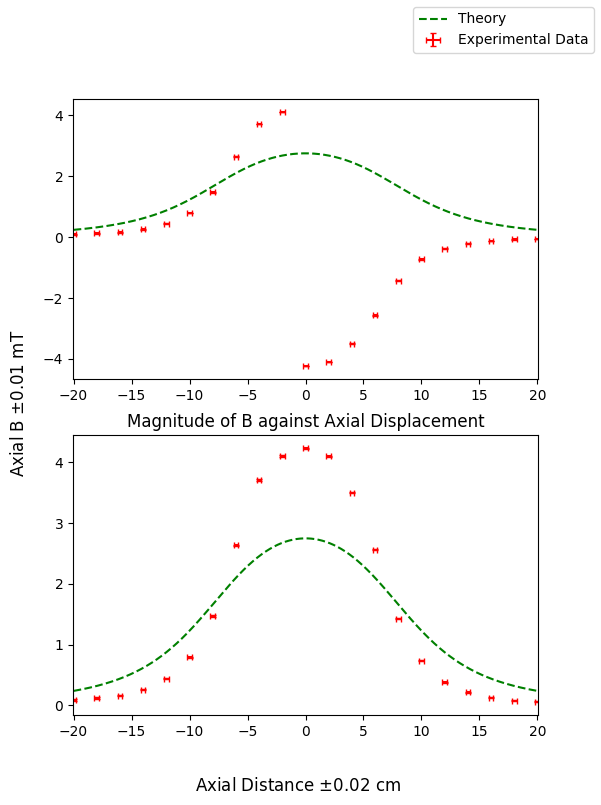

In [719]:
fig,ax = plt.subplots(2,figsize=(6,8))
ax[0].errorbar(x_dist,magnetic_field,0.01,0.2,ls="none",capsize=2,c="red",label="Experimental Data")
ax[0].plot(theory_x,theory*1000,label="Theory",ls="dashed",c="green")
ax[0].set_xlim(-20.05,20.05)

# Absolute Value Experimental Results
ax[1].set_title("Magnitude of B against Axial Displacement")
ax[1].errorbar(x_dist,np.abs(magnetic_field),0.01,0.2,ls="none",capsize=2,c="red",)
ax[1].plot(theory_x,theory*1000,ls="dashed",c="green")
ax[1].set_xlim(-20.05,20.05)

fig.supylabel("Axial B $\pm 0.01$ mT")
fig.supxlabel("Axial Distance $\pm 0.02$ cm")

fig.legend()
plt.show()

In [720]:
del x_dist,magnetic_field,theory_x,theory

## 3.0 Radial and Tangential Magnetic Fields

In [721]:
def helmholtz_mag_radial(number_of_turns:int,current:float,coil_radius:float,distance_from_coil_center:float,theta:float,MU_0=mu_0):
    constant = (MU_0 * number_of_turns * current) / 2
    return constant * (((coil_radius**2) * np.cos(theta))/(distance_from_coil_center**3))


def helmholtz_mag_tangential(number_of_turns:int,current:float,coil_radius:float,distance_from_coil_center:float,theta:float,MU_0=mu_0):
    constant = (MU_0 * number_of_turns * current) / 4
    ratio = (coil_radius**2 * np.sin(theta)) / (distance_from_coil_center**3)

    return constant * ratio


### 3.1 Radial Magnetic Field of Helmholtz Coil

- $0-360º$ orientation

### 3.2 Tangential Magnetic Field of Helmholtz Coil
- $0-360º$ orientation

In [722]:
distance_from_coil_center = 9.6 #cm
num_coils = 320
radius_coil_out = 146.4/10 #cm
radius_coil_in = 119.1/10 #cm
radius_coil_center = radius_coil_in +  (radius_coil_out - radius_coil_in)/2



theta = np.arange(0,361,30)

radial_mag_field = np.mean(np.array([[0.91,0.92,0.95],
                                     [1.14,1.16,1.2],
                                     [1.43,1.42,1.4],
                                     [-0.87,-0.86,-0.87],
                                     [-1.13,-1.11,-1.14],
                                     [-0.91,-0.89,-0.92],
                                     [-0.9,-0.86,-0.88],
                                     [-1.07,-1.06,-1.06],
                                     [-1.36,-1.34,-1.37],
                                     [0.77,0.74,0.75],
                                     [1.19,1.17,1.18],
                                     [0.91,0.93,0.93],
                                     [0.91,0.9,0.9]]),1)

tangential_mag_field = np.mean(np.array([[0.14,0.16,0.16],
                                         [0.1,0.12,0.1],
                                         [0.51,0.5,0.54],
                                         [4.47,4.46,4.45],
                                         [-0.3,-0.28,-0.28],
                                         [-0.23,-0.2,-0.21],
                                         [-0.1,-0.13,-0.13],
                                         [-0.09,-0.05,-0.07],
                                         [-0.41,-0.42,-0.44],
                                         [-4.61,-4.59,-4.59],
                                         [0.29,0.31,0.31],
                                         [0.25,0.24,0.25],
                                         [0.15,0.15,0.17]]),1)

theory_theta = np.linspace(0,360,10000) * (np.pi/180)
theory_radial = helmholtz_mag_radial(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_out/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)
theory_tangential = helmholtz_mag_tangential(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_out/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)

theory_radial_in = helmholtz_mag_radial(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_in/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)
theory_tangential_in = helmholtz_mag_tangential(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_in/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)

theory_radial_center = helmholtz_mag_radial(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_center/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)
theory_tangential_center = helmholtz_mag_tangential(number_of_turns=num_coils,current=1.4,coil_radius=radius_coil_center/100,distance_from_coil_center=distance_from_coil_center/100,theta=theory_theta)

theory_theta_degrees = np.linspace(0,360,10000)

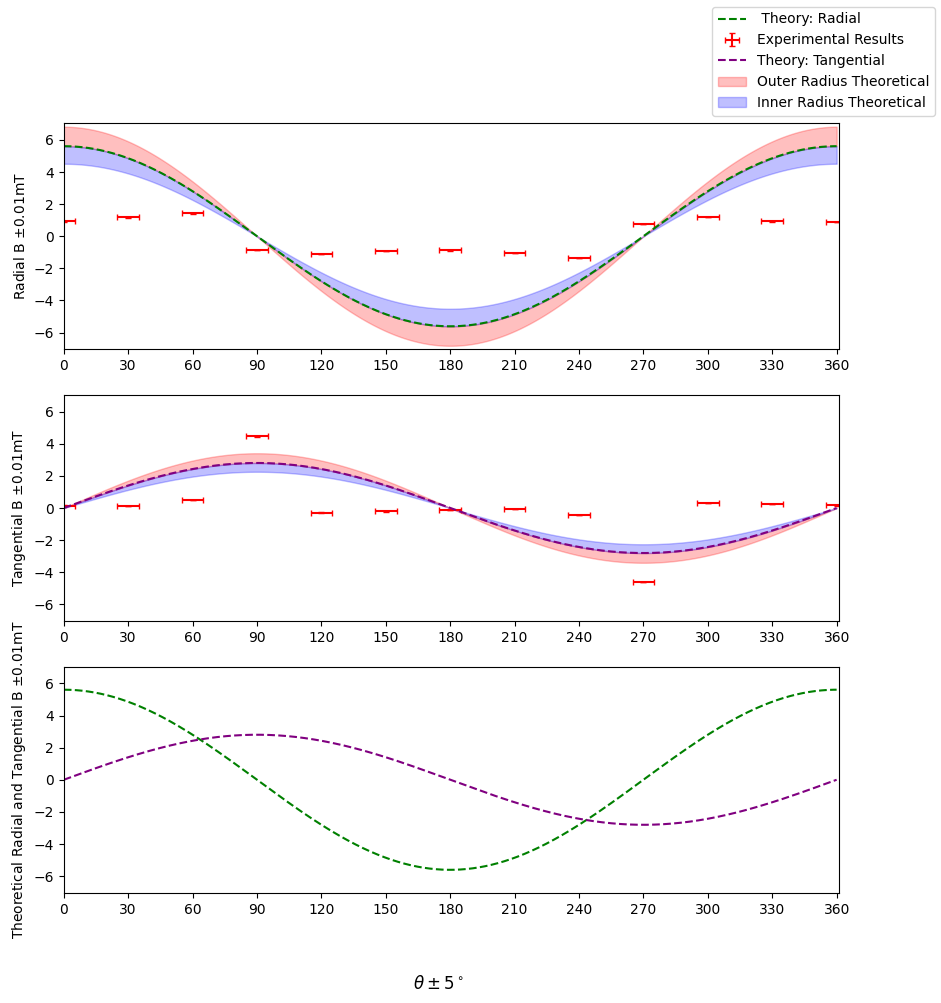

In [723]:
fig,ax = plt.subplots(3,figsize=(10,10))

ax[0].errorbar(theta,radial_mag_field,0.01,5,ls="none",c="red",capsize=2,label="Experimental Results")

ax[0].fill_between(theory_theta_degrees,theory_radial*1000,theory_radial_center*1000,alpha=0.25,color="red")
ax[0].fill_between(theory_theta_degrees,theory_radial_center*1000,theory_radial_in*1000,alpha=0.25,color="blue")
ax[0].plot(theory_theta_degrees,theory_radial_center*1000,ls="dashed",c="green",label=" Theory: Radial")


ax[0].set_ylabel("Radial B $\pm 0.01$mT")
ax[0].set_ylim(-7.05,7.05)
ax[0].set_xlim(0,361)
ax[0].set_xticks(np.arange(0,361,30))

ax[1].errorbar(theta,tangential_mag_field,0.01,5,ls="none",c="red",capsize=2)
ax[1].plot(theory_theta_degrees,theory_tangential_center*1000,ls="dashed",c="purple",label="Theory: Tangential")
ax[1].fill_between(theory_theta_degrees,theory_tangential*1000,theory_tangential_center*1000,alpha=0.25,color="red",label="Outer Radius Theoretical")
ax[1].fill_between(theory_theta_degrees,theory_tangential_center*1000,theory_tangential_in*1000,alpha=0.25,color="blue",label="Inner Radius Theoretical")
ax[1].set_ylabel("Tangential B $\pm 0.01$mT ")
ax[1].set_ylim(-7.05,7.05)
ax[1].set_xlim(0,361)
ax[1].set_xticks(np.arange(0,361,30))

ax[2].set_ylabel("Theoretical Radial and Tangential B $\pm 0.01$mT")
ax[2].plot(theory_theta_degrees,theory_radial_center*1000,ls="dashed",c="green")
ax[2].set_ylim(-7.05,7.05)
ax[2].plot(theory_theta_degrees,theory_tangential_center*1000,ls="dashed",c="purple")
ax[2].set_xlim(0,361)
ax[2].set_xticks(np.arange(0,361,30))

fig.supxlabel("$\\theta \pm 5^\circ$")
fig.legend()
plt.show()

In [724]:
del theta, radial_mag_field, tangential_mag_field, theory_theta, theory_radial, theory_tangential, distance_from_coil_center,num_coils,radius_coil_out,radius_coil_in, theory_radial_center,theory_radial_in,theory_tangential_center,theory_tangential_in,radius_coil_center,theory_theta_degrees

## 4.0

### 4.1 Axial Magnetic Field of Helmholtz Coils

In [784]:
x_distance_coil_probe = np.arange(-10,11,1)
axial_magnetic_field = np.flip(np.array([0.82,1,1.25,1.57,1.94,2.38,2.94,3.45,3.95,4.30,4.39,4.19,3.78,3.26,2.69,2.21,1.76,1.41,1.14,0.91,0.74]))

current = 1.4

radius_coil_out = 146.4/10 #cm
radius_coil_in = 119.1/10 #cm
radius_coil_center = radius_coil_in +  (radius_coil_out - radius_coil_in)/2

theory_x = np.linspace(-10,10,10000)
theory = 320*biot_savart_loop(theory_x/100,1.4,radius_coil_out/100)*1000
theory_in = 320*biot_savart_loop(theory_x/100,1.4,radius_coil_in/100)*1000
theory_center = 320*biot_savart_loop(theory_x/100,1.4,radius_coil_center/100)*1000

In [785]:
def f(x,a,b,c):
    return a*np.exp(-(x+b)**2/(2*c**2))


def f(x,a,b,c):
    return c+ (a/((b**2 + x**2)**1.5))
coef,_ =  curve_fit(f,x_distance_coil_probe,axial_magnetic_field)

fit_x = np.linspace(-10,10,10000)






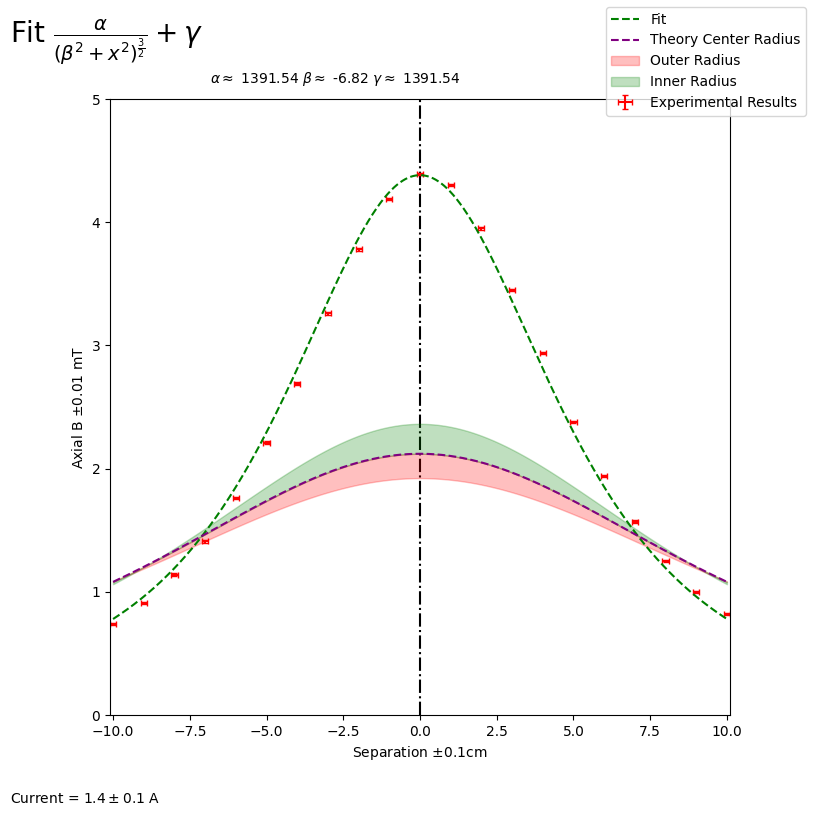

In [787]:
fig,ax = plt.subplots(figsize=(8,8))
ax.errorbar(x_distance_coil_probe,axial_magnetic_field,0.01,0.1,ls="none",c="red",label="Experimental Results",capsize=2)
ax.plot(fit_x,f(fit_x,*coef),ls="dashed",c="green",label="Fit")
ax.plot(theory_x,theory_center,ls="dashed",c="purple",label="Theory Center Radius")
ax.fill_between(theory_x,theory,theory_center,alpha=0.25,color="red",label="Outer Radius")
ax.fill_between(theory_x,theory_in,theory_center,alpha=0.25,color="green",label="Inner Radius")

ax.set_xlabel("Separation $\pm 0.1$cm")
ax.set_ylabel("Axial B $\pm 0.01$ mT")
ax.vlines(0,0,100,ls="dashdot",color="black",zorder=-999)
ax.set_xlim(-10.1,10.1)
ax.set_ylim(0,5)
fig.legend()
plt.figtext(0,0,"Current = $1.4\pm 0.1$ A")
plt.figtext(0,0.95,"Fit $\\frac{\\alpha}{(\\beta^2 + x^2)^\\frac{3}{2}}+\\gamma$",size=20)
plt.figtext(0.25,0.9,f"$\\alpha \\approx$ {coef[0]:.2f} $\\beta \\approx$ {coef[1]:.2f} $\\gamma \\approx$ {coef[0]:.2f}")
plt.show()

In [728]:
del x_distance_coil_probe,axial_magnetic_field,current,coef,_,fit_x,f

### 4.2

In [729]:
separations = np.array([6,9,12,15]) #cm
ds = separations/10
values = {
    6:np.array([3.32,3.45,3.53,3.58,3.62,3.62,3.60,3.57,3.53,3.44,3.33]),
    9:np.array([2.82,2.90,2.90,2.85,2.78,2.76,2.76,2.83,2.87,2.88,2.83]),
    12:np.array([2.57,2.60,2.44,2.25,2.08,2.02,2.09,2.21,2.41,2.56,2.57]),
    15:np.array([2.44,2.40,2.13,1.79,1.54,1.47,1.53,1.74,2.06,2.37,2.47])
}

x_values = {
    6:np.arange(0,separations[0]+ds[0],ds[0]),
    9:np.arange(0,separations[1]+ds[1],ds[1]),
    12:np.arange(0,separations[2]+ds[2],ds[2]),
    15:np.arange(0,separations[3]+ds[3],ds[3])
}

In [762]:
max(values[15]) - min(values[15])

np.float64(1.0000000000000002)

#### Fitting

In [730]:
def f(x,a,b,c):
    return a*np.sin(b*x)+c

def g(x,a,b,c):
    return a*np.cos(b*x)+c

In [731]:
fit_6_coef,_ = curve_fit(f,x_values[6],values[6])
fit_9_coef,_ = curve_fit(f,x_values[9],values[9])
fit_12_coef,_ = curve_fit(g,x_values[12],values[12])
fit_15_coef,_ = curve_fit(g,x_values[15],values[15])


In [732]:
fit_6_coeff = poly.polyfit(x_values[6],values[6],2)
fit_6 = poly.Polynomial(fit_6_coeff)

fit_9_coeff = poly.polyfit(x_values[9],values[9],3)
fit_9 = poly.Polynomial(fit_9_coeff)

fit_12_coeff = poly.polyfit(x_values[12],values[12],3)
fit_12 = poly.Polynomial(fit_12_coeff)

fit_15_coeff = poly.polyfit(x_values[15],values[15],3)
fit_15 = poly.Polynomial(fit_15_coeff)



fits = {
    6: fit_6,
    9: fit_9,
    12: fit_12,
    15: fit_15
}
fit_x = np.linspace(0,10.1,10000)

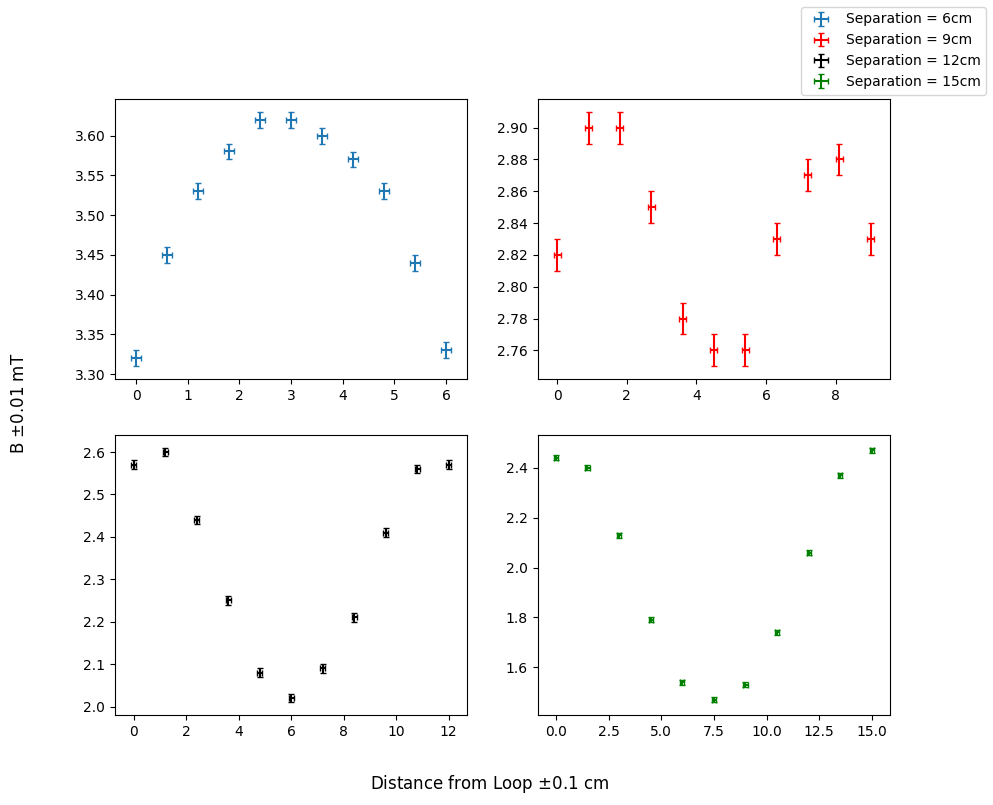

In [733]:
fig,ax = plt.subplots(2,2,figsize=(10,8))
ax[0,0].errorbar(x_values[6],values[6],0.01,0.1,capsize=2,label="Separation = 6cm",ls="none")
ax[0,1].errorbar(x_values[9],values[9],0.01,0.1,capsize=2,label="Separation = 9cm",c="red",ls="none")
ax[1,0].errorbar(x_values[12],values[12],0.01,0.1,capsize=2,label="Separation = 12cm",c="black",ls="none")
ax[1,1].errorbar(x_values[15],values[15],0.01,0.1,capsize=2,label="Separation = 15cm",c="green",ls="none")

fig.legend()
fig.supxlabel("Distance from Loop $\pm 0.1$ cm")
fig.supylabel("B $\pm 0.01$ mT")
plt.show()

Text(0.02, 0.5, 'B (mT)')

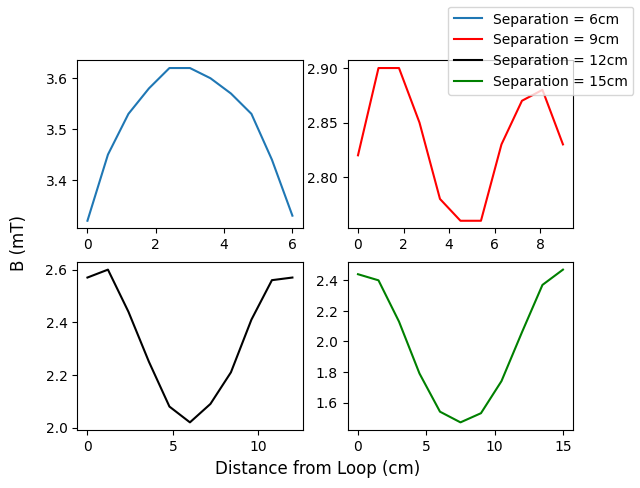

In [734]:
fig,ax = plt.subplots(2,2)
ax[0,0].plot(x_values[6],values[6],label="Separation = 6cm")
ax[0,1].plot(x_values[9],values[9],label="Separation = 9cm",c="red")
ax[1,0].plot(x_values[12],values[12],label="Separation = 12cm",c="black")
ax[1,1].plot(x_values[15],values[15],label="Separation = 15cm",c="green")
fig.legend()
fig.supxlabel("Distance from Loop (cm)")
fig.supylabel("B (mT)")

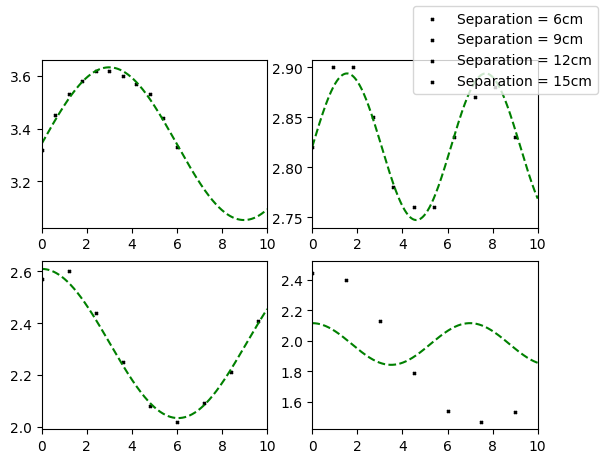

In [735]:
fig,ax = plt.subplots(2,2)
#ax[0,0].plot(fit_x,fits[6](fit_x),ls="dashed")
ax[0,0].plot(fit_x,f(fit_x,*fit_6_coef),ls="dashed",c="green")
ax[0,0].scatter(x_values[6],values[6],s=4,c="black",marker="x",label="Separation = 6cm")
ax[0,0].set_xlim(0,10)
#ax[0,1].plot(fit_x,fits[9](fit_x),ls="dashed")

ax[0,1].plot(fit_x,f(fit_x,*fit_9_coef),ls="dashed",c="green")
ax[0,1].scatter(x_values[9],values[9],s=4,marker="x",label="Separation = 9cm",c="black")
ax[0,1].set_xlim(0,10)
#ax[1,0].plot(fit_x,fits[12](fit_x),ls="dashed")
ax[1,0].plot(fit_x,g(fit_x,*fit_12_coef),ls="dashed",c="green")
ax[1,0].scatter(x_values[12],values[12],s=4,c="black",marker="x",label="Separation = 12cm")
ax[1,0].set_xlim(0,10)
#ax[1,1].plot(fit_x,fits[15](fit_x),ls="dashed")
ax[1,1].plot(fit_x,g(fit_x,*fit_15_coef),ls="dashed",c="green")
ax[1,1].scatter(x_values[15],values[15],s=4,c="black",marker="x",label="Separation = 15cm")
ax[1,1].set_xlim(0,10)
fig.legend()

In [774]:
values_ranges = np.array([max(values[6])-min(values[6]),max(values[9])-min(values[9]),max(values[12])-min(values[12]),max(values[15])-min(values[15])])
seps = np.array([6,9,12,15])

In [779]:
coef = poly.polyfit(seps,values_ranges,2)
func = poly.Polynomial(coef)
f_x = np.linspace(6,15,10000)

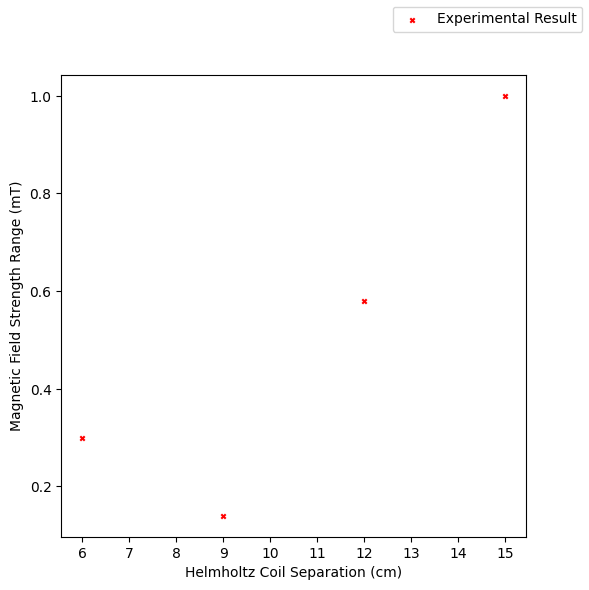

In [782]:
fig,ax = plt.subplots(figsize=(6,6))

ax.scatter(seps,values_ranges,s=10,c="red",marker="x",label="Experimental Result")
#ax.plot(f_x,func(f_x))


ax.set_ylabel("Magnetic Field Strength Range (mT)")
ax.set_xlabel("Helmholtz Coil Separation (cm)")
ax.set_xticks(np.arange(6,16,1))
fig.legend()
plt.show()